ANOVA (Analysis of Variance) is a statistical test used to analyze the difference between the means of more than two groups.

A two-way ANOVA is used to estimate how the mean of a quantitative variable changes according to the levels of two categorical variables. Use a two-way ANOVA when you want to know how two independent variables, in combination, affect a dependent variable.

Example
You are researching which type of fertilizer and planting density produces the greatest crop yield in a field experiment. You assign different plots in a field to a combination of fertilizer type (1, 2, or 3) and planting density (1=low density, 2=high density), and measure the final crop yield in bushels per acre at harvest time.
You can use a two-way ANOVA to find out if fertilizer type and planting density have an effect on average crop yield.

ref ; https://www.scribbr.com/statistics/two-way-anova/

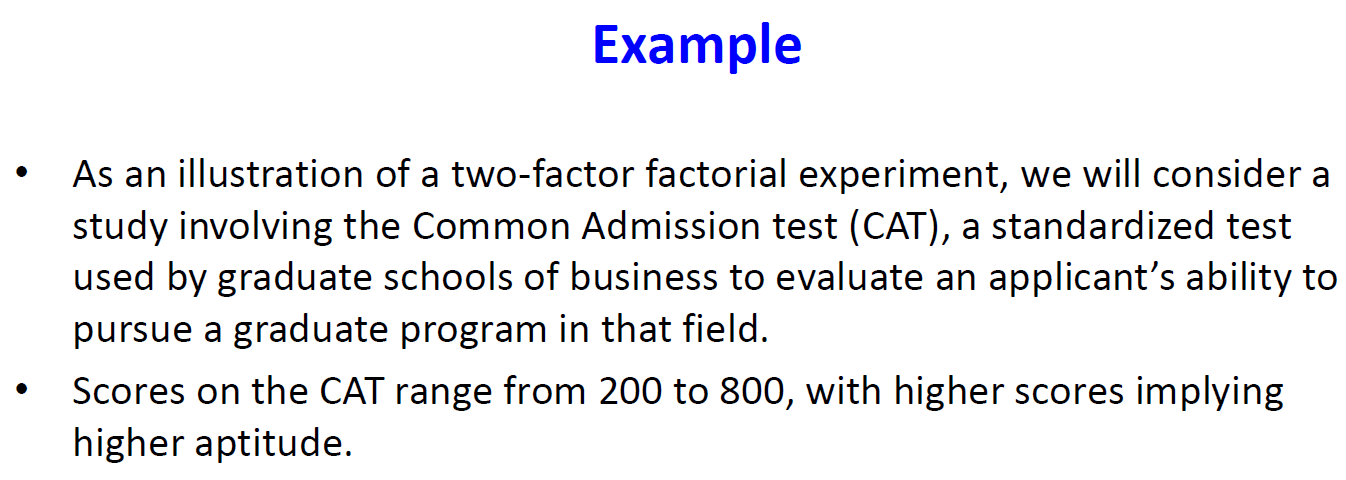

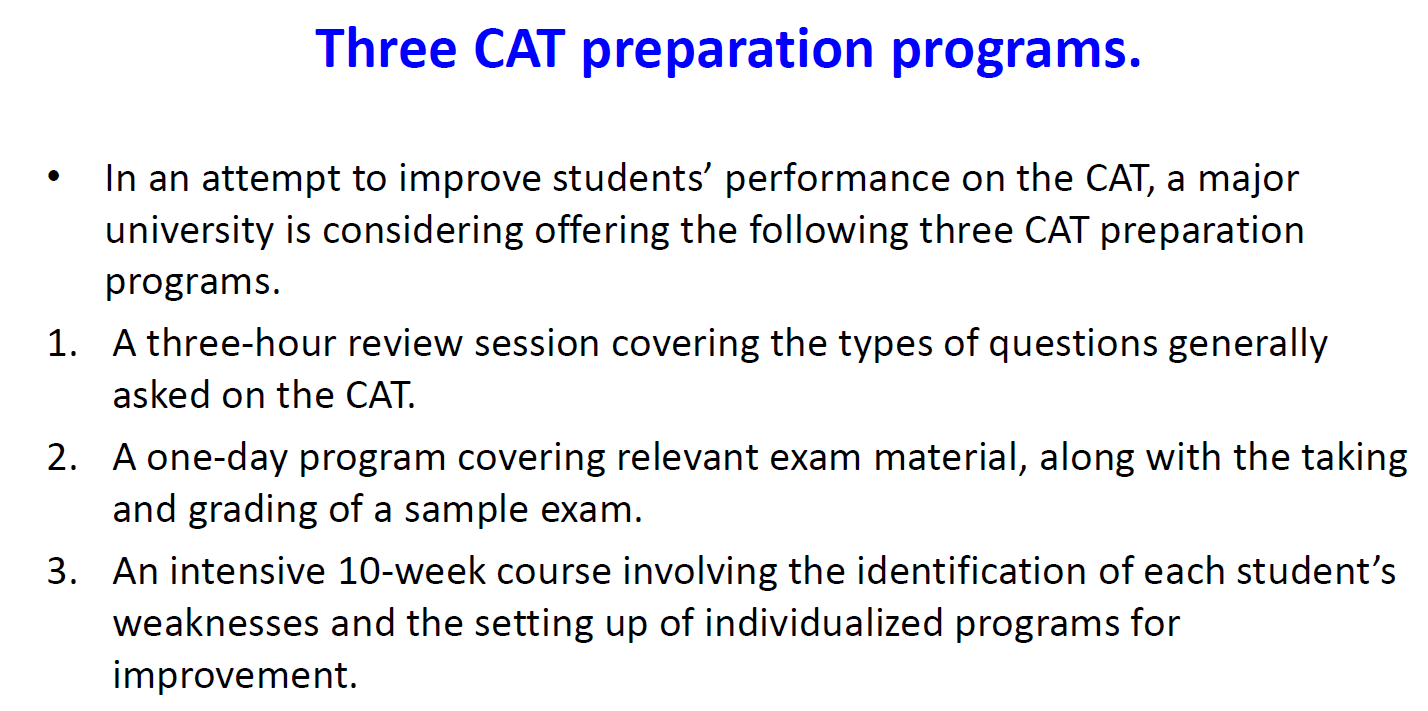

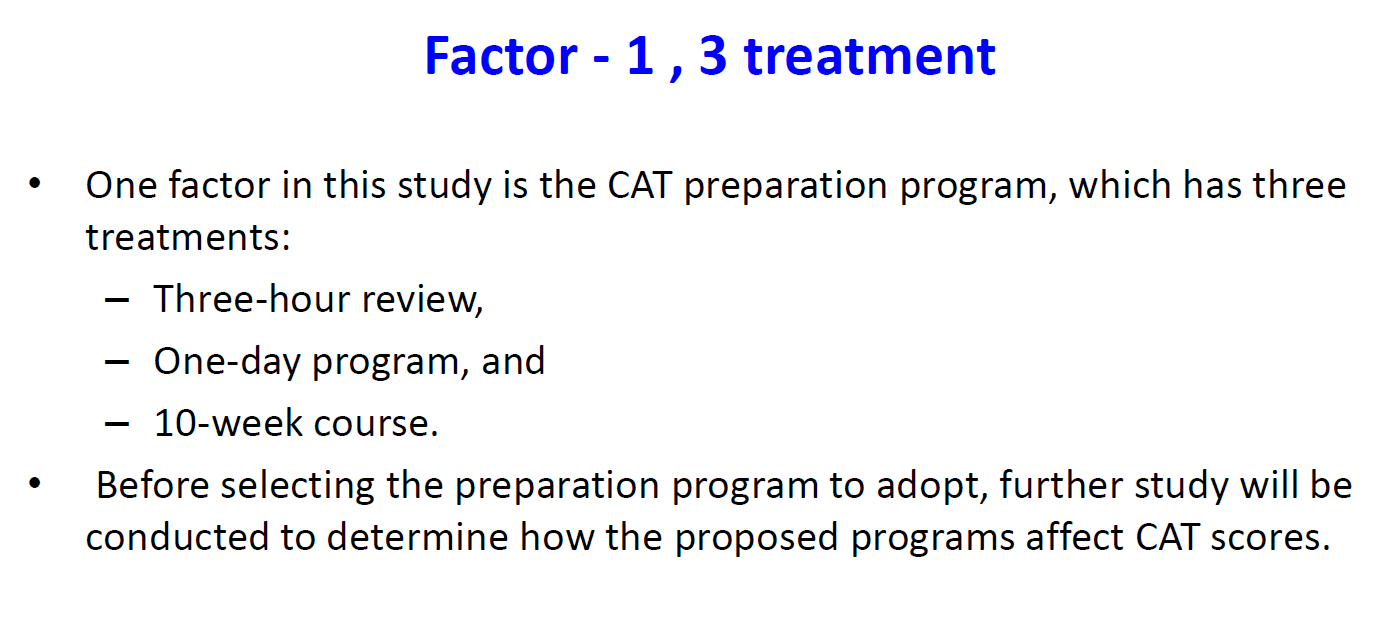

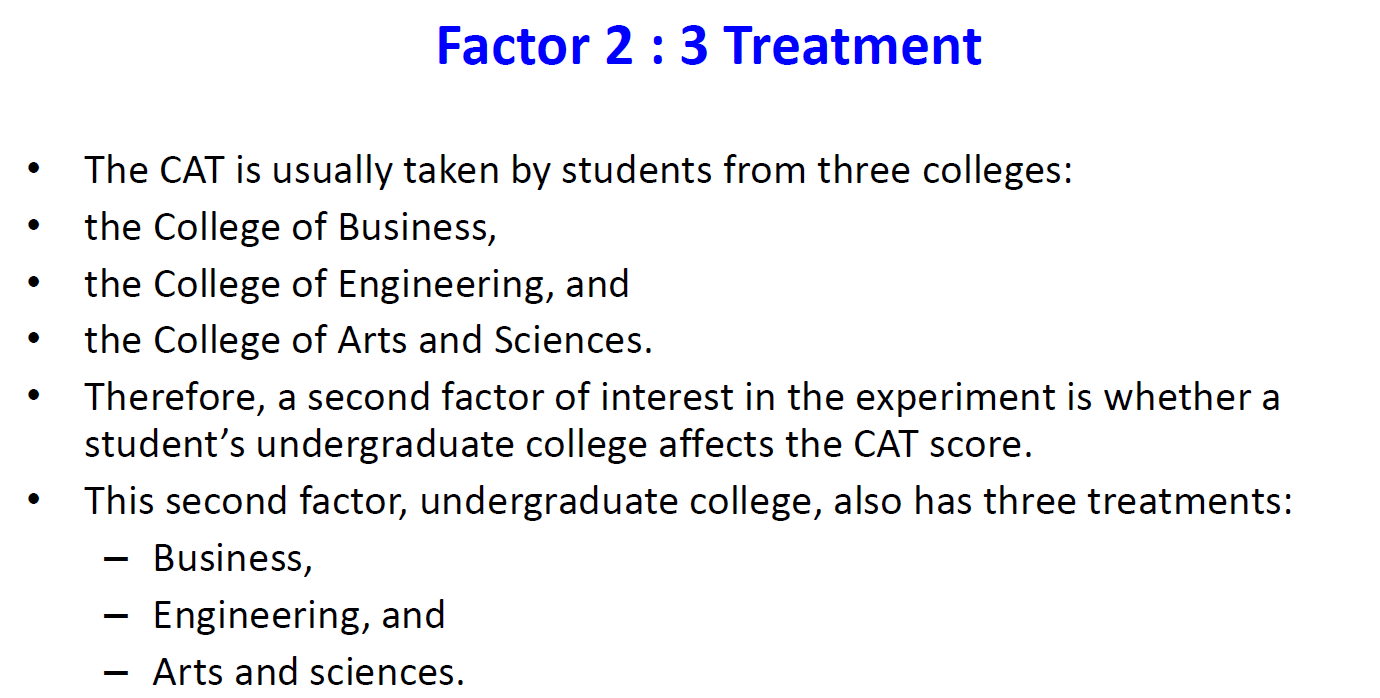

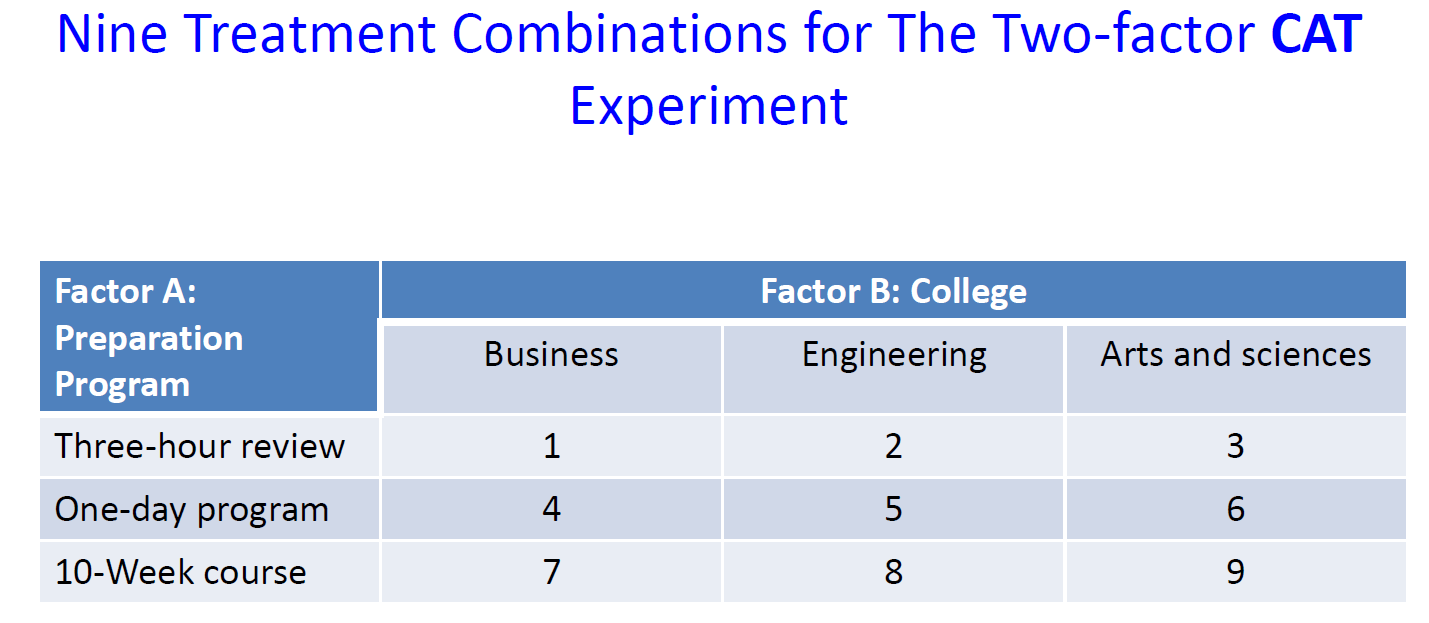

In [7]:
import statsmodels.formula.api as sfa
from statsmodels import api as sm
import pandas as pd

df = pd.read_excel(r'D:\ERA_ML\IIT Roorkee\Dataset\week_6\Important Data-20220425T103808Z-001\Important Data\Twoway.xlsx')
df

#Factor 1 : Ind Var : Prep Program : Categorical data
#Factor 2 : Ind Var : UG College : categorical data
#Depend Var : CAT Score : Interval or ration data

,Value,prep_pro,college
0,500,three_hr,Business
1,580,three_hr,Business
2,540,three_hr,Engineering
3,460,three_hr,Engineering
4,480,three_hr,Artsandscience
5,400,three_hr,Artsandscience
6,460,One-day,Business
7,540,One-day,Business
8,560,One-day,Engineering
9,620,One-day,Engineering


In [9]:
model = sfa.ols('Value ~C(prep_pro)+C(college)+C(prep_pro):C(college)',data=df).fit()
model.summary()


C:\Users\Z028726\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3.548
Date:                Sun, 08 May 2022   Prob (F-statistic):             0.0384
Time:                        18:17:07   Log-Likelihood:                -88.591
No. Observations:                  18   AIC:                             195.2
Df Residuals:                       9   BIC:                             203.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                           445.0000     33.208     13.400      0.000     369.878     520.122
C(prep_pro)[T.One-day]                                5.0000     46.963      0.106      0.918    -101.238     111.238
C(prep_pro)[T.three_hr]                              -5.0000     46.963     -0.106      0.918    -111.238     101.238
C(college)[T.Business]                              135.0000     46.963      2.875      0.018      28.762     241.238
C(college)[T.Engineering]                           145.0000     46.963      3.088      0.013      38.762     251.238
C(prep_pro)[T.One-day]:C(college)[T.Business]       -85.0000     66.416     -1.280      0.233    -235.244      65.244
C(prep_pro)[T.three_hr]:C(college)[T.Business]      -35.0000     66.416     -0.527      0.611    -185.244     115.244
C(prep_pro)[T.One-day]:C(college)[T.Engineering]     -5.0000     66.416     -0.075      0.942    -155.244     145.244
C(prep_pro)[T.three_hr]:C(college)[T.Engineering]   -85.0000     66.416     -1.280      0.233    -235.244      65.244
==============================================================================
Omnibus:                       16.430   Durbin-Watson:                   2.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                2.333
Skew:                           0.000   Prob(JB):                        0.311
Kurtosis:                       1.236   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
anova_table=sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(prep_pro),6100.0,2.0,1.382872,0.299436
C(college),45300.0,2.0,10.269521,0.004757
C(prep_pro):C(college),11200.0,4.0,1.269521,0.350328
Residual,19850.0,9.0,NaN,NaN


# Conclusion :
<ol>
    <li><strong>The UG college has significant effect on CAT score.</strong> 😒</li>
    <li>The preparation program does not have significant effect</li>
    <li>The interaction of these two factors is also not significant</li>
</ol>